In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv('youtube_statistics.csv')   # loading file
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


In [72]:
df.size

662238

In [73]:
df.shape

(36791, 18)

In [74]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   trending_date           36791 non-null  object
 1   title                   36791 non-null  object
 2   channel_title           36791 non-null  object
 3   category_id             36791 non-null  int64 
 4   publish_time            36791 non-null  object
 5   tags                    36791 non-null  object
 6   views                   36791 non-null  int64 
 7   likes                   36791 non-null  int64 
 8   dislikes                36791 non-null  int64 
 9   comment_count           36791 non-null  int64 
 10  comments_disabled       36791 non-null  bool  
 11  ratings_disabled        36791 non-null  bool  
 12  video_error_or_removed  36791 non-null  bool  
 13  description             36746 non-null  object
 14  No_tags                 36791 non-null  int64 
 15  de

In [75]:
df.describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000
mean,21.552173,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361
std,6.586716,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,23.000000,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000
50%,24.000000,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000
75%,24.000000,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


In [76]:
df.isnull().sum()

,0
trending_date,0
title,0
channel_title,0
category_id,0
publish_time,0
tags,0
views,0
likes,0
dislikes,0
comment_count,0


In [77]:
df = df.drop(columns=['title', 'tags','video_id','thumbnail_link',
    'comments_disabled','ratings_disabled','video_error_or_removed','len_title'], errors='ignore')
print("Columns after deletion:\n", df.columns.tolist())

Columns after deletion:
 ['trending_date', 'channel_title', 'category_id', 'publish_time', 'views', 'likes', 'dislikes', 'comment_count', 'description', 'No_tags', 'desc_len', 'publish_date']


In [78]:
df.duplicated().sum()

np.int64(4229)

In [79]:
df['description'] = df['description'].fillna('nil') # Filling missing description values with No description.
df['no_tags'] = df['No_tags'].fillna('nil')
df['desc_len'] = df['desc_len'].fillna('nil')
df['publish_date'] = df['publish_date'].fillna('nil')

In [80]:
df.shape

(36791, 13)

In [81]:
df.isnull().sum()

,0
trending_date,0
channel_title,0
category_id,0
publish_time,0
views,0
likes,0
dislikes,0
comment_count,0
description,0
No_tags,0


In [82]:
df.columns = (
    df.columns
    .str.strip()            # remove leading/trailing spaces
    .str.lower()            # convert to lowercase
    .str.replace(' ', '_')  # replace spaces with underscore
    .str.replace(r'[^\w\s]', '', regex=True)  # remove special chars
)

df.columns

Index(['trending_date', 'channel_title', 'category_id', 'publish_time',
       'views', 'likes', 'dislikes', 'comment_count', 'description', 'no_tags',
       'desc_len', 'publish_date', 'no_tags'],
      dtype='object')

In [83]:
print('final dataset shape :',df.shape)
print(df.dtypes)
display(df.nunique().sort_values(ascending=False).to_frame('n_unique')) ## How many unique values per column
print('final dataset shape :',df.shape)

final dataset shape : (36791, 13)
trending_date    object
channel_title    object
category_id       int64
publish_time     object
views             int64
likes             int64
dislikes          int64
comment_count     int64
description      object
no_tags           int64
desc_len          int64
publish_date     object
no_tags           int64
dtype: object


,n_unique
views,31638
likes,15473
description,13980
publish_time,12375
comment_count,6024
dislikes,5072
desc_len,2850
channel_title,1390
publish_date,219
trending_date,205


final dataset shape : (36791, 13)


In [84]:
df.to_csv('youtube_statistics_cleaned.csv', index=False) # downloaded clean datset file.

# **Exploring Data Analysis**

In [85]:
df.describe(include='all').T # describing all columns and transposed for easy reading...


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
trending_date,36791,205,2017-12-23,199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
channel_title,36791,1390,VikatanTV,284,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_id,36791.0,NaN,NaN,NaN,21.552173,6.586716,1.0,23.0,24.0,24.0,43.0
publish_time,36791,12375,04:30:00,333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views,36791.0,NaN,NaN,NaN,1071490.258976,3207149.048175,4024.0,125604.0,307836.0,806631.5,125432237.0
likes,36791.0,NaN,NaN,NaN,27450.693675,97831.29478,0.0,879.0,3126.0,14095.0,2912710.0
dislikes,36791.0,NaN,NaN,NaN,1685.363404,16197.31684,0.0,109.0,331.0,1032.0,1545017.0
comment_count,36791.0,NaN,NaN,NaN,2714.022043,14978.114328,0.0,83.0,336.0,1314.5,827755.0
description,36791,13980,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_tags,36791.0,NaN,NaN,NaN,18.938463,9.843531,1.0,12.0,19.0,25.0,72.0


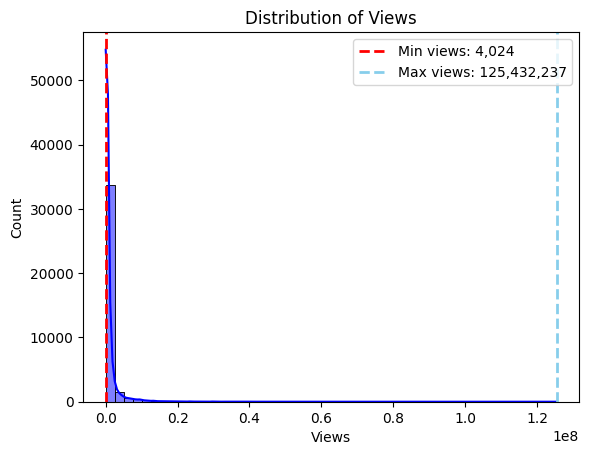

Lowest view count : 4024
Highest view count : 125432237


In [86]:
x = 'views'
min_views = df[x].min()
max_views = df[x].max()
sns.histplot(df[x], kde=True, bins=50, color='blue')
plt.axvline(min_views, color='red', linestyle='--', linewidth=2, label=f'Min views: {min_views:,}')
plt.axvline(max_views, color='skyblue', linestyle='--', linewidth=2, label=f'Max views: {max_views:,}')
plt.xlabel('Views')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Distribution of Views')
plt.show()
print("Lowest view count :",min_views)
print("Highest view count :",max_views)

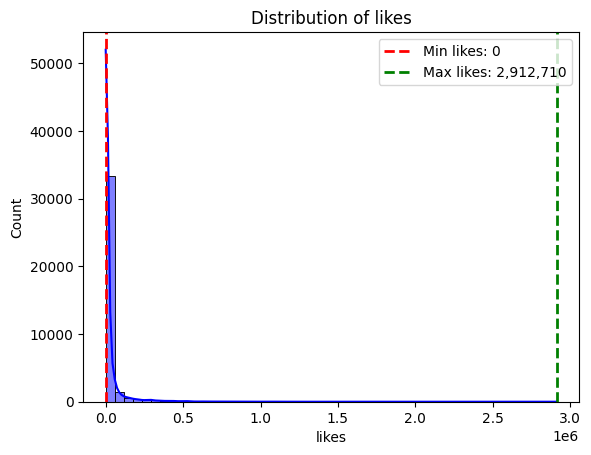

Lowest likes count : 0
Highest likes count : 2912710


In [87]:
x = 'likes'
min_likes = df[x].min()
max_likes = df[x].max()
sns.histplot(df[x], kde=True, bins=50, color='blue')
plt.axvline(min_likes, color='red', linestyle='--', linewidth=2, label=f'Min likes: {min_likes:,}')
plt.axvline(max_likes, color='green', linestyle='--', linewidth=2, label=f'Max likes: {max_likes:,}')
plt.xlabel('likes')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Distribution of likes')
plt.show()
print("Lowest likes count :",min_likes)
print("Highest likes count :",max_likes)

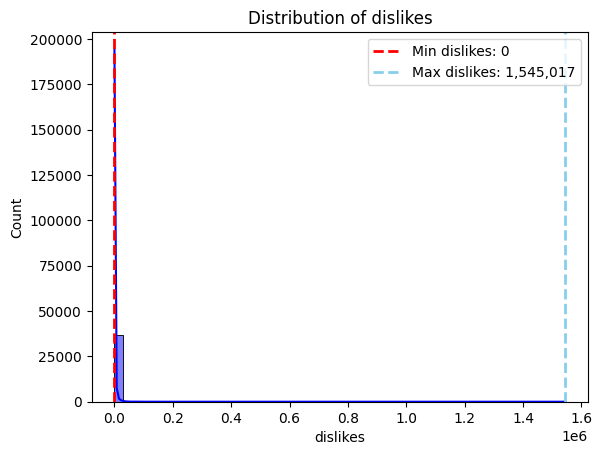

Lowest dislikes count : 0
Highest dislikes count : 1545017


In [88]:
x = 'dislikes'
min_dislikes = df[x].min()
max_dislikes = df[x].max()
sns.histplot(df[x], kde=True, bins=50, color='blue')
plt.axvline(min_dislikes, color='red', linestyle='--', linewidth=2, label=f'Min dislikes: {min_dislikes:,}')
plt.axvline(max_dislikes, color='skyblue', linestyle='--', linewidth=2, label=f'Max dislikes: {max_dislikes:,}')
plt.xlabel('dislikes')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Distribution of dislikes')
plt.show()
print("Lowest dislikes count :",min_dislikes)
print("Highest dislikes count :",max_dislikes)

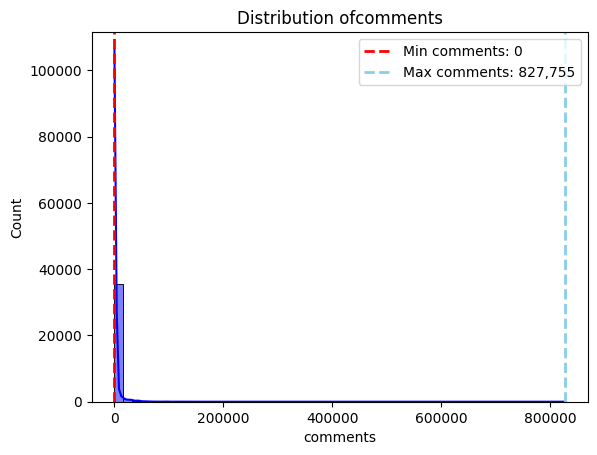

Lowest comments count : 0
Highest comments count : 827755


In [89]:
x = 'comment_count'
min_comments= df[x].min()
max_comments= df[x].max()
sns.histplot(df[x], kde=True, bins=50, color='blue')
plt.axvline(min_comments, color='red', linestyle='--', linewidth=2, label=f'Min comments: {min_comments:,}')
plt.axvline(max_comments, color='skyblue', linestyle='--', linewidth=2, label=f'Max comments: {max_comments:,}')
plt.xlabel('comments')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Distribution ofcomments')
plt.show()
print("Lowest comments count :",min_comments)
print("Highest comments count :",max_comments)

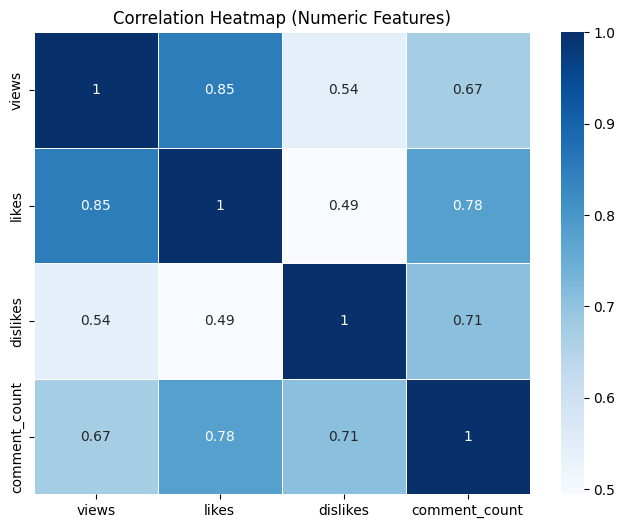

In [104]:
numeric_cols = ['views', 'likes', 'dislikes', 'comment_count']
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [105]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_hour'] = df['publish_time'].dt.hour
df['publish_day'] = df['publish_time'].dt.dayofweek

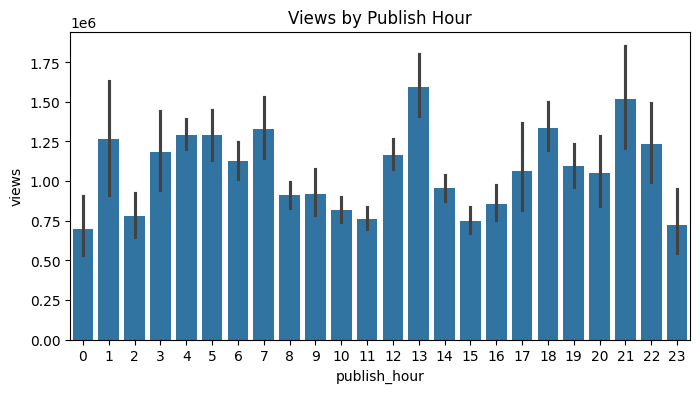

In [106]:
plt.figure(figsize=(8,4))
sns.barplot(x='publish_hour', y='views', data=df)
plt.title('Views by Publish Hour')
plt.show()

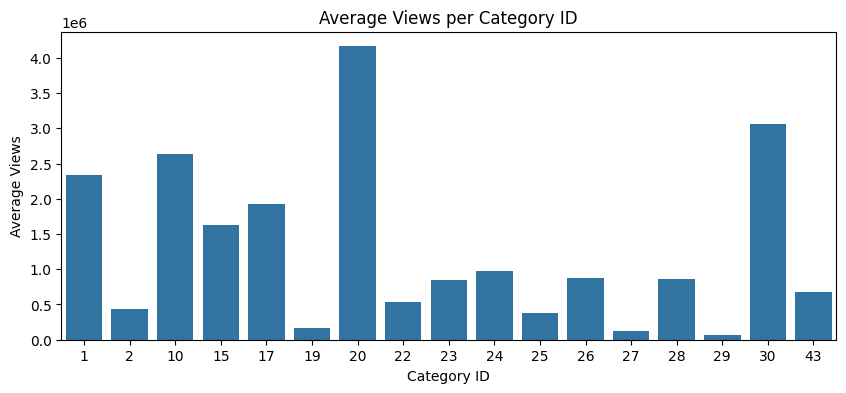

In [107]:
plt.figure(figsize=(10,4))
sns.barplot(x='category_id', y='views', data=df, estimator=np.mean, errorbar=None)
plt.title('Average Views per Category ID')
plt.xlabel('Category ID')
plt.ylabel('Average Views')
plt.show()

In [93]:
category_map = {
    1: 'Film & Animation',
    2: 'Autos & Vehicles',
    10: 'Music',
    15: 'Pets & Animals',
    17: 'Sports',
    19: 'Travel & Events',
    20: 'Gaming',
    22: 'People & Blogs',
    23: 'Comedy',
    24: 'Entertainment',
    25: 'News & Politics',
    26: 'How-to & Style',
    27: 'Education',
    28: 'Science & Technology'
}

df['category_name'] = df['category_id'].map(category_map)


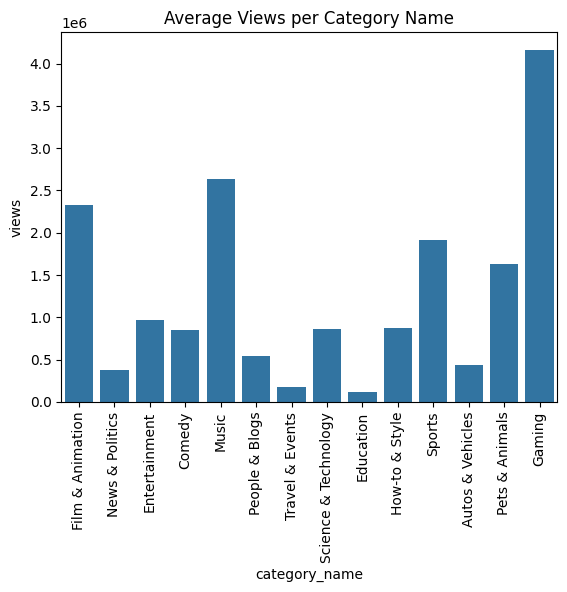

In [94]:
sns.barplot(x='category_name', y='views', data=df, estimator=np.mean, errorbar=None)
plt.xticks(rotation=90)
plt.title('Average Views per Category Name')
plt.show()

In [95]:
#Engagement Ratios
df['like_ratio']    = df['likes'] / (df['views'] + 1) # adding +1 for avoiding division by zero,if video has a zero views
df['dislike_ratio'] = df['dislikes'] / (df['views'] + 1)
df['comment_ratio'] = df['comment_count'] / (df['views'] + 1)

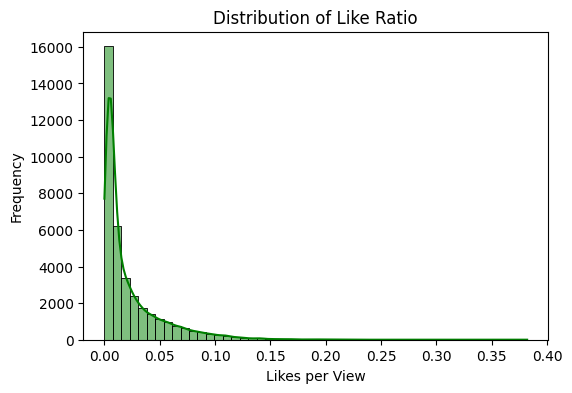

In [96]:
plt.figure(figsize=(6,4))
sns.histplot(df['like_ratio'], bins=50, kde=True, color='green')
plt.title('Distribution of Like Ratio')
plt.xlabel('Likes per View')
plt.ylabel('Frequency')
plt.show()


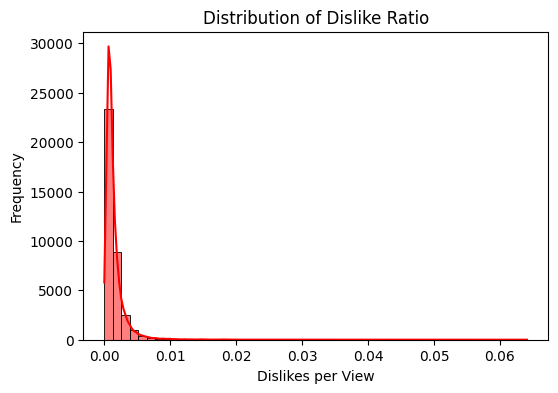

In [97]:
plt.figure(figsize=(6,4))
sns.histplot(df['dislike_ratio'], bins=50, kde=True, color='red')
plt.title('Distribution of Dislike Ratio')
plt.xlabel('Dislikes per View')
plt.ylabel('Frequency')
plt.show()


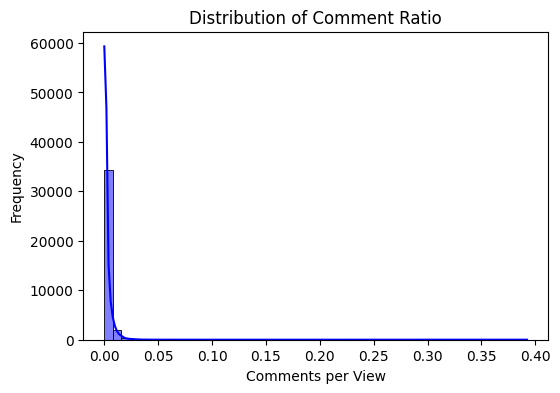

In [98]:
plt.figure(figsize=(6,4))
sns.histplot(df['comment_ratio'], bins=50, kde=True, color='blue')
plt.title('Distribution of Comment Ratio')
plt.xlabel('Comments per View')
plt.ylabel('Frequency')
plt.show()


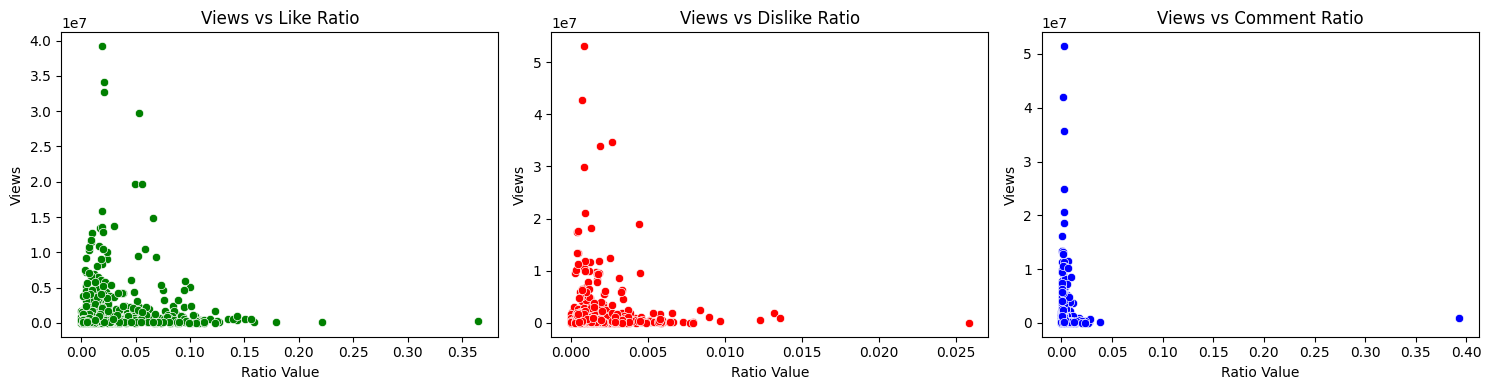

In [99]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

sns.scatterplot(x='like_ratio', y='views', data=df.sample(1000), ax=axes[0], color='green')
axes[0].set_title('Views vs Like Ratio')

sns.scatterplot(x='dislike_ratio', y='views', data=df.sample(1000), ax=axes[1], color='red')
axes[1].set_title('Views vs Dislike Ratio')

sns.scatterplot(x='comment_ratio', y='views', data=df.sample(1000), ax=axes[2], color='blue')
axes[2].set_title('Views vs Comment Ratio')

for ax in axes:
    ax.set_xlabel('Ratio Value')
    ax.set_ylabel('Views')

plt.tight_layout()
plt.show()


# ** Feature Engineering**

In [100]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in ['category','channel_title']:
    if col in df.columns:
        df[col + '_enc'] = encoder.fit_transform(df[col].astype(str))


In [101]:
from sklearn.preprocessing import StandardScaler
scale_cols = ['likes','dislikes','comment_count',
              'duration_min','title_length','tag_count']
scale_cols = [c for c in scale_cols if c in df.columns]

scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])


In [102]:
target = 'views'  # the variable we want to predict

feature_cols = [
    'likes','dislikes','comment_count',
    'title_length','tag_count',
    'publish_hour','publish_day','publish_month',
    'like_ratio','dislike_ratio','comment_ratio',
    'duration_min','category_enc','channel_title_enc'
]
feature_cols = [c for c in feature_cols if c in df.columns]

X = df[feature_cols]
y = df[target]

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (36791, 9)
Target shape: (36791,)
